In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '10011'

In [7]:
#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber)) 
# the n+1 qubits are indexed 0...n, so the last qubit is index n

# Step 1 - range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.h(range(len(secretnumber)))
#circuit.h([0,1,2,3,4,5])

#circuit.x(6)
#circuit.h(6)

circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

# Step 2
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1': 
        circuit.cx(ii,len(secretnumber))

circuit.barrier()

# Step 3  range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

# Step 4 - Measure the qbits on classical bits
#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)),range(len(secretnumber))) 


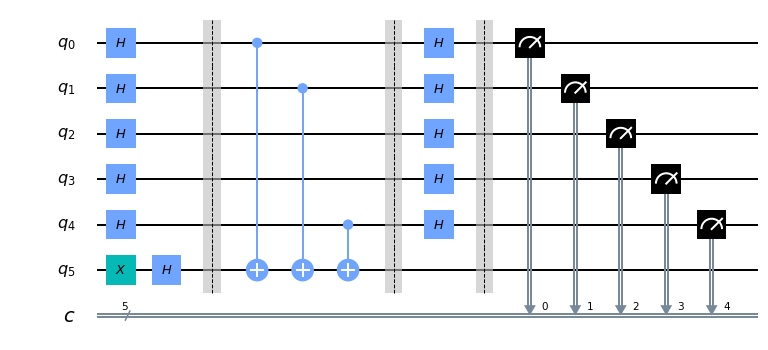

In [8]:
circuit.draw(output='mpl')

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1).result()
counts = result.get_counts()
#print(result)
print(counts)
print("Great, You Have Found out the Secret Number:")


{'10011': 1}
Great, You Have Found out the Secret Number:


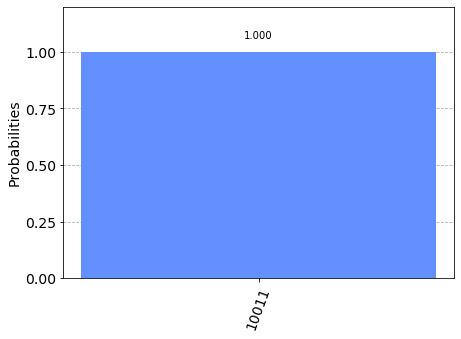

In [6]:
plot_histogram(result.get_counts(circuit))
